In [9]:
import tensorflow as tf
import matplotlib.pyplot as plt

tf.random.set_seed(0)

n_input = 1
n_hidden = 20
n_output = 1

In [10]:
tf.keras.backend.set_floatx('float64')
tf.keras.backend.floatx()

'float64'

In [11]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(n_hidden, input_shape=(n_input, ), activation='tanh'))
model.add(tf.keras.layers.Dense(n_hidden, activation='tanh'))
model.add(tf.keras.layers.Dense(n_hidden, activation='tanh'))
model.add(tf.keras.layers.Dense(n_output, activation='linear'))

optimizer = tf.optimizers.Adam(learning_rate=0.1)

In [12]:
# @tf.function
def residual(y, x):
  kappa = 0.5
  dy_dx = tf.gradients(y, x)[0]
  d2y_dx2 = tf.gradients(dy_dx, x)[0]
  
  LHS = kappa * d2y_dx2
  RHS = dy_dx - dy_dx**2 - y * dy_dx
  res = LHS - RHS
  return res

# @tf.function
def boundary(y, x):
  dy_dx = tf.gradients(y, x)[0]
  bdy1 = y[0] - 0
  bdy2 = dy_dx[0] - 0.1
  return bdy1**2 + bdy2**2

@tf.function
def step(x):    
    with tf.GradientTape() as tape:
        y = model(x)        
        # dy_dx = tf.gradients(y, x)[0]
        # d2y_dx2 = tf.gradients(dy_dx, x)[0]        
        # LHS = kappa * d2y_dx2
        # RHS = dy_dx - dy_dx**2 - y * dy_dx
        # res = LHS - RHS

        # dy_dx = tf.gradients(y, x)[0]
        # bdy1 = y[0] - 0
        # bdy2 = dy_dx[0] - 0.1
        # bdy = bdy1**2 + bdy2**2
        
        bdy = boundary(y, x)
        res = residual(y, x)
        loss = tf.reduce_mean(res**2 + bdy)
    
    weights = model.trainable_weights
    grads = tape.gradient(loss, weights)
    optimizer.apply_gradients(zip(grads, weights))

    return loss

In [13]:
kappa = tf.constant(0.5, dtype=tf.float64)
x = tf.linspace(0.0, 3.0, 1000)
x = tf.cast(x, dtype=tf.float64)
X = tf.reshape(x, (-1, 1))

losses = []
for i in range(1000):
    loss = step(X).numpy()
    losses.append(loss)
    if i % 10 == 0:
      print("{:03d} : {:08.6f}".format(i, sum(losses[-10:])/10))


000 : 0.035689
010 : 4.628923
020 : 0.166265
030 : 0.057218
040 : 0.027678
050 : 0.010708
060 : 0.006856
070 : 0.004366
080 : 0.002379
090 : 0.001638
100 : 0.001322
110 : 0.001027
120 : 0.000752
130 : 0.000524
140 : 0.000343
150 : 0.000217
160 : 0.000138
170 : 0.000095
180 : 0.000073
190 : 0.000062
200 : 0.000056
210 : 0.000052
220 : 0.000048
230 : 0.000045
240 : 0.000043
250 : 0.000040
260 : 0.000038
270 : 0.000036
280 : 0.000034
290 : 0.000033
300 : 0.000031
310 : 0.000030
320 : 0.000028
330 : 0.000027
340 : 0.000025
350 : 0.000024
360 : 0.000023
370 : 0.000022
380 : 0.000021
390 : 0.000020
400 : 0.000019
410 : 0.000018
420 : 0.000017
430 : 0.000017
440 : 0.000016
450 : 0.000015
460 : 0.000015
470 : 0.000014
480 : 0.000013
490 : 0.000013
500 : 0.000012
510 : 0.000012
520 : 0.000011
530 : 0.000011
540 : 0.000010
550 : 0.000010
560 : 0.000009
570 : 0.000009
580 : 0.000009
590 : 0.000008
600 : 0.000008
610 : 0.000008
620 : 0.000007
630 : 0.000007
640 : 0.000007
650 : 0.000007
660 : 0.00

In [14]:
@tf.function
def solution(c):
  return tf.gradients(model(c), c)[0]

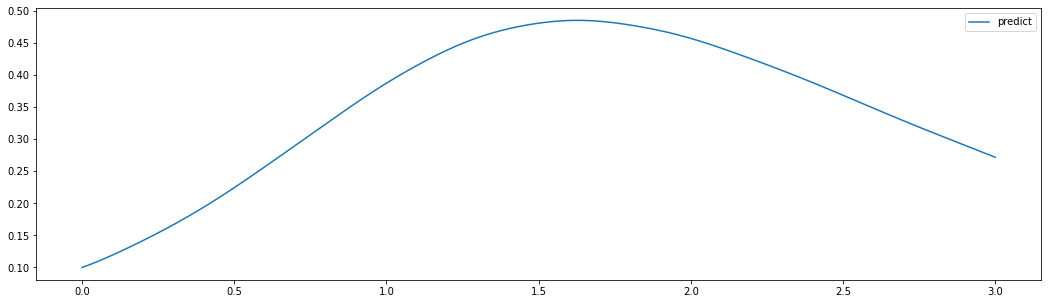

In [15]:
fig, axs = plt.subplots(1,1, figsize=(18,5))

domain = x.numpy()
exact = tf.exp(domain).numpy()
predict = solution(X).numpy().flatten()

# axs[0].plot(domain, exact, label='exact')
axs.plot(domain, predict, label='predict')
axs.legend()

# axs[1].plot(domain, exact - predict, label='residual')
# axs[1].legend()
# fig.savefig('residual.jpg',bbox_inches='tight')

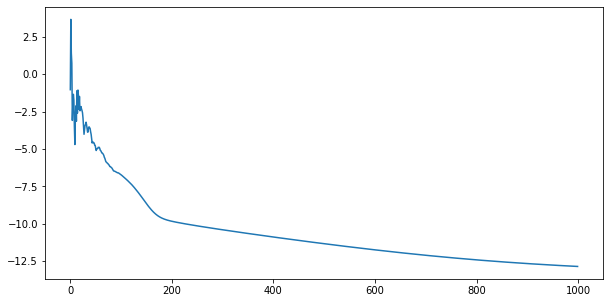

In [16]:
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(10,5))
plt.plot(np.log(losses))
plt.savefig('f.jpg',bbox_inches='tight')